## Problem Metadata 
DO NOT DELETE (JSON Block; the metadata and course context MUST be in the first cell)

```json
{
    "problem_title": "turbineEnthalpyVsInternalEnergy",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["easy"],
    "topic": "Control Volumes",
    "lecture_reference": {
        "lecture_id": "1_0r6wkz1o",
        "subtopics": [
            {
              "key": "Fa25-L5a-4.0",
              "title": "Applying conservation of mass and energy principles for a control volume to a turbine.",
            }
        ]
    },
    "book_reference": {
              "chapter_number": 5,
              "title": "Mass and Energy Analysis of Control Volumes",
        "sections": [
            "Some Steady-Flow Engineering Devices",
        ]
    },
    "notes": ""
}
```

## 1. Problem Statement
Steam enters a turbine at 4600 kg/hr and a pressure of 60 bar and 400$^\circ$C and exits at 0.2 bar and a vapor quality of 0.9. 

**Goal**: 
* Determine the shaft power and the total power transferred from the system.

## 2. Schematic
Draw a control volume. One control volume for the iron block (CV1). Another control volume for the water bath (CV2).

## 3. Assumptions and Approximations
* Neglect kinetic and potential energy
* Steady-flow system
* Determine properties using `pyCalor`
  

## 4. Physical Laws and Governing Equations
Conservation of mass:
$$\frac{dm_\text{CV}}{dt} = \dot{m}_\text{in} - \dot{m}_\text{out} $$

Steady flow:
$$0 = \dot{m}_\text{in} - \dot{m}_\text{out} $$
$$\dot{m}_\text{in} = \dot{m}_\text{out} = \dot{m}$$

Conservation of energy:
$$\frac{dE_\text{CV}}{dt} = \dot{E}_\text{in} - \dot{E}_\text{out} $$

Steady flow:
$$0 = \dot{E}_\text{in} - \dot{E}_\text{out} $$
$$\dot{E}_\text{in} = \dot{E}_\text{out}$$

$$\dot{W}_\text{in} + \dot{Q}_\text{in} + \dot{m} \left(h_3 + (w_3^2/2) + g z_3 \right) = \dot{W}_\text{out} + \dot{Q}_\text{out} + \dot{m} \left(h_4 + (w_4^2/2) + g z_4 \right)$$

Neglecting changes in kinetic and potential energy and assuming the turbine is adiabatic we can write:
$$\dot{m} h_3 = \dot{W}_\text{out} + \dot{m} h_4$$

The shaft work out can then be written as:
$$ \dot{W}_\text{S,out} = \dot{m} \left(h_1 - h_2 \right)$$

The overall work transferred out, including flow work, is:

$$ \dot{W}_\text{net,out} = \dot{m} (u_1 - u_2)$$

What we see from this is that:

$$ \dot{W}_\text{S,out} \ne \dot{W}_\text{net,out} $$

In [1]:
## 5. Properties (Code Cell)
!pip install pyCalor
from pyCalor import thermo as th

# A steam turbine operates with the conditions listed below. 
mdot_kgPerHr = 4600
# conversion
mdot_kgPerS = mdot_kgPerHr/(60*60)

# state 1
p1_bar = 60
T1_C = 400
st1 = th.state('water',T=(T1_C,'C'),p=(p1_bar,'bar'),name='1')

# state 2
p2_bar = 0.2
x2 = 0.9
st2 = th.state('water',x=x2,p=(p2_bar,'bar'),name='2')

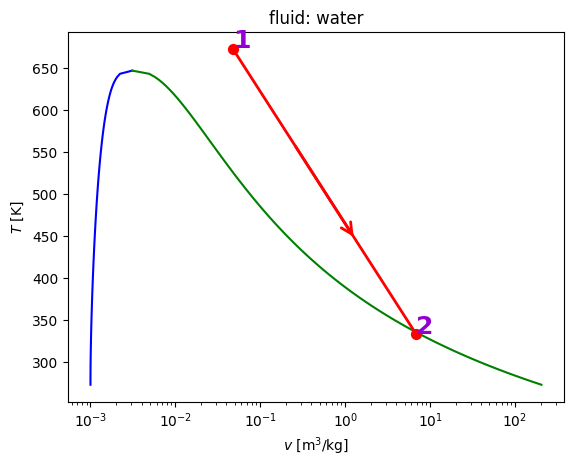

1028724.359969618
841.0739174317035


In [2]:
# 6 Calculations (Code Cell)
# process
pr = th.process([(st1,st2)])

# T-v plot
pr.plot('Tv')

# Answer: part (a)
W_shaft_out_kW = mdot_kgPerS*(1000*(st1.h-st2.h)); print(W_shaft_out_kW)

# Answer: part (b)
W_total_out_kW = mdot_kgPerS*(st1.u-st2.u); print(W_total_out_kW)

## 7. Summary and Reasoning
The total work is different from the shaft work because the total work contains flow work.

THIS SHOULD BE THE FINAL CELL, DO NOT ADD OTHERS AFTER THIS, EVEN IF THEY'RE EMPTY
--- End of the Jupyter Notebook ---